<a href="https://colab.research.google.com/github/sudeepchopde/Stock-price-prediction/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Prediction

This project aims to predict the price movement of selected Indian stocks (ADANIPORTS, AXISBANK, BAJAJ-AUTO, and RELIANCE) over a 6-month horizon using historical stock data. Various machine learning models are explored and evaluated for their performance in classifying future stock movements into 'Up', 'Down', or 'Sideways'.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load  dataset
df1 = pd.read_csv("/content/drive/MyDrive/stock project/ADANIPORTS.csv", parse_dates=["Date"])
df2 = pd.read_csv("/content/drive/MyDrive/stock project/AXISBANK.csv", parse_dates=["Date"])
df3 = pd.read_csv("/content/drive/MyDrive/stock project/BAJAJ-AUTO.csv", parse_dates=["Date"])
df4 = pd.read_csv("/content/drive/MyDrive/stock project/RELIANCE.csv", parse_dates=["Date"])


In [ ]:
# Concatenate the four dataframes
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Replacing 'MUNDRAPORT' with 'ADANIPORTS' and 'UTIBANK' with 'AXISBANK' in the 'Symbol' column as they are the same stock
df['Symbol'] = df['Symbol'].replace('MUNDRAPORT', 'ADANIPORTS')
df['Symbol'] = df['Symbol'].replace('UTIBANK', 'AXISBANK')

# Sort the dataframe by date
df = df.sort_values(by='Date')

# Display the first few rows of the concatenated dataframe
display(df.head())

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
11830,2000-01-03,RELIANCE,EQ,233.05,237.5,251.70,237.5,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
3322,2000-01-03,AXISBANK,EQ,24.70,26.7,26.70,26.7,26.70,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
11831,2000-01-04,RELIANCE,EQ,251.70,258.4,271.85,251.3,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
3323,2000-01-04,AXISBANK,EQ,26.70,27.0,28.70,26.5,27.00,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
3324,2000-01-05,AXISBANK,EQ,26.85,26.0,27.75,25.5,26.40,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.drop(columns = ["Trades", "Deliverable Volume", "%Deliverble"], inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17136 entries, 0 to 17135
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        17136 non-null  datetime64[ns]
 1   Symbol      17136 non-null  object        
 2   Series      17136 non-null  object        
 3   Prev Close  17136 non-null  float64       
 4   Open        17136 non-null  float64       
 5   High        17136 non-null  float64       
 6   Low         17136 non-null  float64       
 7   Last        17136 non-null  float64       
 8   Close       17136 non-null  float64       
 9   VWAP        17136 non-null  float64       
 10  Volume      17136 non-null  int64         
 11  Turnover    17136 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
count,17136,17136.000000,17136.000000,17136.000000,17136.000000,17136.000000,17136.000000,17136.000000,1.713600e+04,1.713600e+04
mean,2012-03-11 21:06:28.235294208,970.323506,971.491798,985.615187,956.358514,970.524107,970.584617,971.124834,3.780424e+06,3.117638e+14
min,2000-01-03 00:00:00,22.150000,21.000000,23.700000,21.000000,22.150000,22.150000,22.170000,2.850000e+03,8.275250e+09
25%,2008-05-02 00:00:00,346.250000,347.500000,353.975000,340.087500,346.550000,346.300000,347.120000,4.350268e+05,4.449058e+13
50%,2012-08-30 12:00:00,730.950000,731.975000,742.875000,719.750000,730.975000,731.025000,730.895000,2.155933e+06,1.443866e+14
75%,2016-12-30 18:00:00,1324.912500,1327.925000,1342.000000,1306.000000,1326.012500,1325.125000,1325.010000,4.741318e+06,3.516018e+14
max,2021-04-30 00:00:00,4237.450000,4260.000000,4361.400000,4200.000000,4236.000000,4237.450000,4260.500000,1.205419e+08,1.473434e+16
std,NaN,824.338037,825.254479,835.082600,814.677429,824.497576,824.563577,824.860707,5.893914e+06,5.742678e+14


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


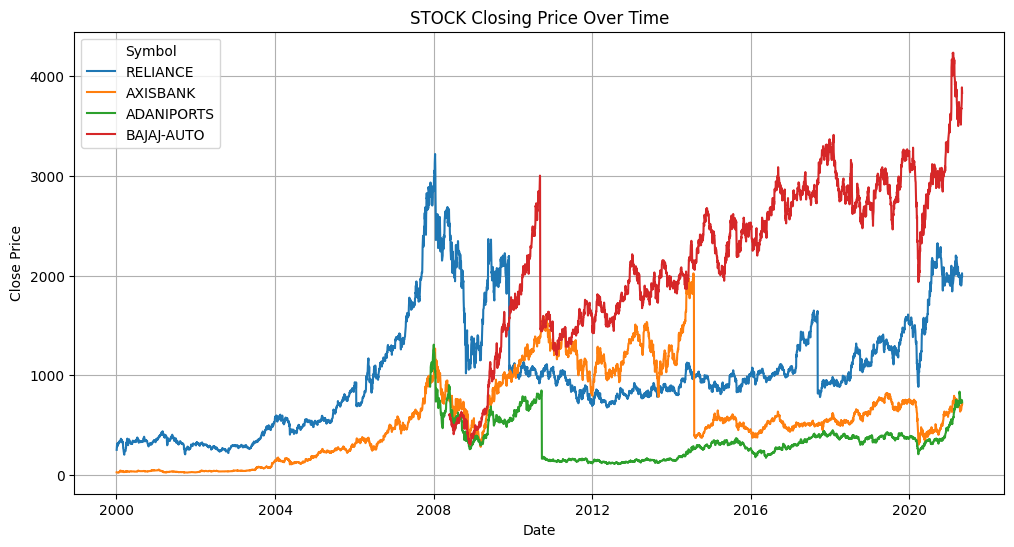

In [ ]:
# Plot closing price using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Close", hue="Symbol")
plt.title("STOCK Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

# **Adjusting the data for stock splits**

The stock split for adani ports on September 23, 2010, may affect the historical price data. Adjusting the data for stock splits involves dividing historical prices before the split by the split ratio...The stock split data for individual stocks were retrieved from the net.

In [ ]:
split_date_adani = pd.to_datetime("2010-09-23")
split_ratio = 5

# Adjust prices before the split date
price_columns = ["Prev Close", "Open", "High", "Low", "Close", "VWAP"]
condition = (df["Date"] < split_date_adani) & (df['Symbol'] == 'ADANIPORTS')
df.loc[condition, price_columns] = df.loc[condition, price_columns] / split_ratio

Adjusting columns for **reliance**

In [ ]:
split_date_reliance = pd.to_datetime("2017-09-26")
split_ratio = 10

# Adjust prices before the split date
price_columns = ["Prev Close", "Open", "High", "Low", "Close", "VWAP"]
condition = (df["Date"] < split_date_reliance) & (df['Symbol'] == 'RELIANCE')
df.loc[condition, price_columns] = df.loc[condition, price_columns] / split_ratio

Adjusting columns for **AXISBANK**

In [ ]:
split_date_axis = pd.to_datetime("2014-07-28")
split_ratio = 5

# Adjust prices before the split date
price_columns = ["Prev Close", "Open", "High", "Low", "Close", "VWAP"]
condition = (df["Date"] < split_date_axis) & (df['Symbol'] == 'AXISBANK')
df.loc[condition, price_columns] = df.loc[condition, price_columns] / split_ratio

**There is no stock split for BajajAuto**

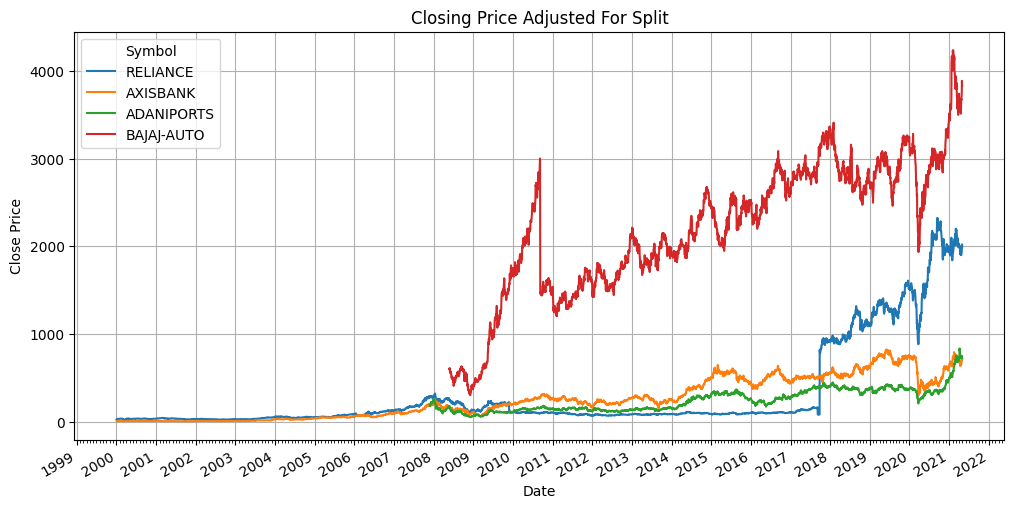

In [ ]:
# Plot closing price adjusted for split using seaborn
import matplotlib.dates as mdates
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Close", hue="Symbol")
plt.title("Closing Price Adjusted For Split")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)

# Format the x-axis to show yearly dates
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator()) # Optional: add minor ticks for months

plt.gcf().autofmt_xdate() # Auto-format date labels

plt.show()

**Feature Engineering**

In [ ]:
df["Return_1M"] = df["Close"].pct_change(periods=21)
df["Volatility_1M"] = df["Close"].rolling(window=21).std()
df["SMA_20"] = df["Close"].rolling(window=20).mean()
df["SMA_50"] = df["Close"].rolling(window=50).mean()
df["SMA_100"] = df["Close"].rolling(window=100).mean()
df["RSI"] = 100 - (100 / (1 + df["Close"].diff().clip(lower=0).rolling(14).mean() /
                             df["Close"].diff().clip(upper=0).abs().rolling(14).mean()))


# Define future return over 6 months (126 trading days)
df["Future_Return_6m"] = (df["Close"].shift(-126) / df["Close"]) - 1

# Multi-class target
def classify_movement(x):
    if x > 0.15:
        return "Up"
    elif x < -0.15:
        return "Down"
    else:
        return "Sideways"

df["Target_6m_multi"] = df["Future_Return_6m"].apply(classify_movement)


In [ ]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Return_1M,Volatility_1M,SMA_20,SMA_50,SMA_100,RSI,Future_Return_6m,Target_6m_multi
0,2000-01-03,RELIANCE,EQ,23.305,23.75,25.170,23.75,251.70,25.170,24.937,4456424,1.111319e+14,NaN,NaN,NaN,NaN,NaN,NaN,-0.715534,Down
1,2000-01-03,AXISBANK,EQ,4.940,5.34,5.340,5.34,26.70,5.340,5.340,112100,2.993070e+11,NaN,NaN,NaN,NaN,NaN,NaN,4.661985,Up
2,2000-01-04,RELIANCE,EQ,25.170,25.84,27.185,25.13,271.85,27.185,26.352,9487878,2.500222e+14,NaN,NaN,NaN,NaN,NaN,NaN,-0.744712,Down
3,2000-01-04,AXISBANK,EQ,5.340,5.40,5.740,5.30,27.00,5.370,5.448,234500,6.387275e+11,NaN,NaN,NaN,NaN,NaN,NaN,4.628492,Up
4,2000-01-05,AXISBANK,EQ,5.370,5.20,5.550,5.10,26.40,5.260,5.248,170100,4.462980e+11,NaN,NaN,NaN,NaN,NaN,NaN,5.200570,Up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17131,2021-04-29,ADANIPORTS,EQ,746.250,753.20,765.850,743.40,746.40,746.750,753.060,13851910,1.043139e+15,-0.608293,1280.424941,1798.6200,1772.959,1766.5700,50.116016,NaN,Sideways
17132,2021-04-30,ADANIPORTS,EQ,746.750,739.00,759.450,724.50,726.40,730.050,743.350,12600934,9.366911e+14,0.108319,1277.491456,1798.8550,1714.534,1766.6515,46.776363,NaN,Sideways
17133,2021-04-30,BAJAJ-AUTO,EQ,3836.450,3805.00,3966.350,3800.00,3827.00,3833.750,3869.170,1340273,5.185744e+14,4.285379,1332.024194,1806.9175,1777.845,1797.8270,57.520565,NaN,Sideways
17134,2021-04-30,AXISBANK,EQ,719.400,705.00,729.850,705.00,711.65,714.900,719.360,23011654,1.655365e+15,-0.805337,1290.480931,1747.4450,1777.250,1768.3285,47.168318,NaN,Sideways


In [ ]:
df.isnull().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Return_1M,Volatility_1M,SMA_20,SMA_50,SMA_100,RSI,Future_Return_6m,Target_6m_multi
99,2000-03-13,RELIANCE,EQ,21.685,21.99,22.950,20.030,203.30,20.320,21.737,10765401,2.340023e+14,1.615187,10.572464,16.16700,19.0522,18.81320,53.293506,-0.670768,Down
100,2000-03-14,RELIANCE,EQ,20.320,20.55,21.950,19.715,219.00,21.920,21.229,10106318,2.145437e+14,-0.341939,9.967881,15.70875,18.8058,18.78070,53.825489,0.515739,Up
101,2000-03-14,AXISBANK,EQ,5.670,5.50,5.660,5.220,27.80,5.480,5.474,143700,3.933420e+11,-0.823709,9.647921,15.62025,18.7636,18.78210,44.385757,0.237226,Up
102,2000-03-15,AXISBANK,EQ,5.480,5.92,5.920,5.920,29.60,5.920,5.920,25600,7.577600e+10,-0.183448,9.707051,14.33225,18.1812,18.56945,49.672342,4.597128,Up
103,2000-03-15,RELIANCE,EQ,21.920,22.40,23.675,21.600,236.75,23.675,23.223,5711222,1.326309e+14,-0.252683,9.168025,15.12450,18.5105,18.75250,49.495038,-0.713622,Down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17005,2021-03-10,BAJAJ-AUTO,EQ,3798.750,3820.00,3879.000,3802.000,3872.00,3867.550,3849.760,545219,2.098964e+14,-0.008600,1300.070184,1878.39000,1880.1030,1893.43050,56.367119,-0.806919,Down
17006,2021-03-10,AXISBANK,EQ,745.450,750.50,765.700,749.150,759.20,760.750,757.880,13377990,1.013886e+15,0.009019,1299.790935,1879.93500,1881.8420,1893.70000,43.681545,-0.040355,Sideways
17007,2021-03-10,RELIANCE,EQ,2191.050,2207.00,2215.100,2170.250,2179.40,2181.950,2187.670,5316182,1.163007e+15,1.989587,1277.033459,1878.92750,1885.3190,1873.15600,50.006710,0.757029,Up
17008,2021-03-12,AXISBANK,EQ,760.750,772.60,776.600,745.000,749.05,750.600,760.490,16343307,1.242900e+15,-0.659144,1298.640058,1722.50500,1885.9420,1861.41900,50.003407,-0.047562,Sideways


In [ ]:
df["Target_6m_multi"].value_counts()

,count
Target_6m_multi,
Up,6864
Down,5957
Sideways,4090


#**MODELING**

**1.LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

features = ["Return_1M", "Volatility_1M", "SMA_20", "SMA_50", "SMA_100", "Volume", "RSI", "VWAP"]
X = df[features]
y = df["Target_6m_multi"]

# Time-based split
split_date_train = pd.to_datetime("2018-12-31")
X_train = X[df["Date"] <= split_date_train]
X_test = X[df["Date"] > split_date_train]
y_train = y[df["Date"] <= split_date_train]
y_test = y[df["Date"] > split_date_train]

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Performance:
              precision    recall  f1-score   support

        Down       0.57      0.86      0.69       819
    Sideways       0.00      0.00      0.00       498
          Up       0.65      0.71      0.68       865

    accuracy                           0.61      2182
   macro avg       0.41      0.52      0.46      2182
weighted avg       0.47      0.61      0.53      2182



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**balancing out the class to improve performance**

In [ ]:
model_lr = LogisticRegression(class_weight='balanced', max_iter=9000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

        Down       0.60      0.79      0.68       819
    Sideways       0.25      0.11      0.16       498
          Up       0.66      0.67      0.67       865

    accuracy                           0.59      2182
   macro avg       0.50      0.52      0.50      2182
weighted avg       0.54      0.59      0.55      2182



#*2*. Random Forest (Tree-Based Model)

              precision    recall  f1-score   support

        Down       0.52      0.70      0.60       819
    Sideways       0.24      0.13      0.17       498
          Up       0.69      0.65      0.67       865

    accuracy                           0.55      2182
   macro avg       0.48      0.49      0.48      2182
weighted avg       0.53      0.55      0.53      2182



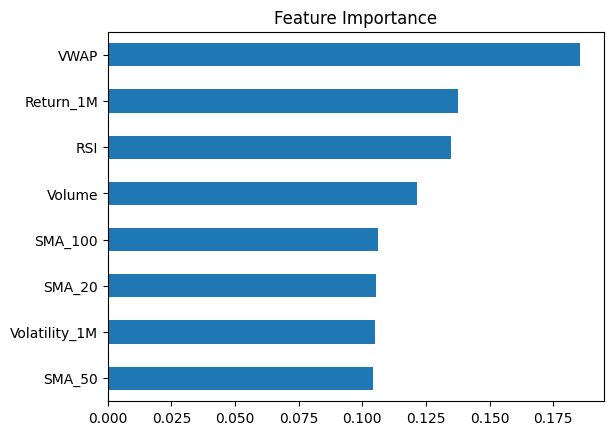

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=150, random_state=42)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

print(classification_report(y_test, y_pred))

# Feature importance
importances = pd.Series(model_rf.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', title="Feature Importance")
plt.show()


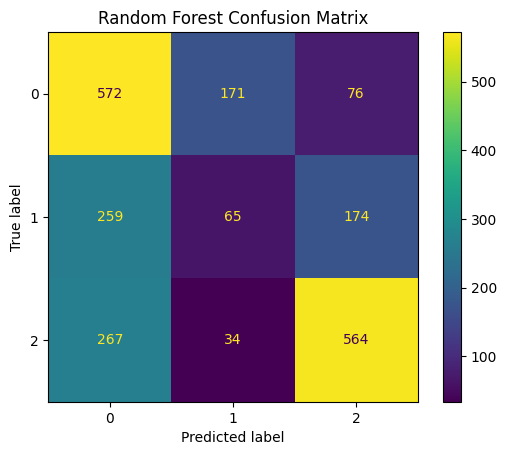

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Random Forest Confusion Matrix")
plt.show()


## Exploring other Scikit-learn Models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Performance:
              precision    recall  f1-score   support

        Down       0.48      0.46      0.47       819
    Sideways       0.24      0.35      0.28       498
          Up       0.58      0.44      0.50       865

    accuracy                           0.43      2182
   macro avg       0.43      0.42      0.42      2182
weighted avg       0.46      0.43      0.44      2182



In [ ]:
from sklearn.preprocessing import StandardScaler

# Support Vector Machine (SVM)
# Scale the data
scaler_svm = StandardScaler()
X_train_scaled_svm = scaler_svm.fit_transform(X_train)
X_test_scaled_svm = scaler_svm.transform(X_test)

model_svm = SVC(kernel='linear', random_state=42, class_weight='balanced')
model_svm.fit(X_train_scaled_svm, y_train)
y_pred_svm = model_svm.predict(X_test_scaled_svm)
print("SVM Performance:")
print(classification_report(y_test, y_pred_svm))

SVM Performance:
              precision    recall  f1-score   support

        Down       0.68      0.62      0.65       819
    Sideways       0.24      0.36      0.28       498
          Up       0.71      0.56      0.63       865

    accuracy                           0.54      2182
   macro avg       0.54      0.51      0.52      2182
weighted avg       0.59      0.54      0.56      2182



In [ ]:
# K-Nearest Neighbors (KNN)
model_knn = KNeighborsClassifier(n_neighbors=4)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
print("KNN Performance:")
print(classification_report(y_test, y_pred_knn))

KNN Performance:
              precision    recall  f1-score   support

        Down       0.46      0.60      0.52       819
    Sideways       0.22      0.18      0.20       498
          Up       0.54      0.42      0.47       865

    accuracy                           0.43      2182
   macro avg       0.40      0.40      0.40      2182
weighted avg       0.43      0.43      0.43      2182



In [ ]:
# Gradient Boosting
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
print("Gradient Boosting Performance:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Performance:
              precision    recall  f1-score   support

        Down       0.55      0.89      0.68       819
    Sideways       0.18      0.03      0.06       498
          Up       0.72      0.63      0.67       865

    accuracy                           0.59      2182
   macro avg       0.48      0.52      0.47      2182
weighted avg       0.53      0.59      0.53      2182



In [ ]:
# XGBoost
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


model_xgb = XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
model_xgb.fit(X_train, y_train_encoded)
y_pred_xgb_encoded = model_xgb.predict(X_test)

# Decode predictions for classification report
y_pred_xgb = le.inverse_transform(y_pred_xgb_encoded)


print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Performance:
              precision    recall  f1-score   support

        Down       0.53      0.74      0.61       819
    Sideways       0.22      0.11      0.14       498
          Up       0.67      0.62      0.64       865

    accuracy                           0.55      2182
   macro avg       0.47      0.49      0.47      2182
weighted avg       0.51      0.55      0.52      2182



In [ ]:
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.preprocessing import MinMaxScaler

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)
print("Naive Bayes Performance:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Performance:
              precision    recall  f1-score   support

        Down       0.50      0.95      0.66       819
    Sideways       0.00      0.00      0.00       498
          Up       0.72      0.52      0.60       865

    accuracy                           0.56      2182
   macro avg       0.41      0.49      0.42      2182
weighted avg       0.47      0.56      0.48      2182



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
